In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
img = cv2.imread('../resources/target0.JPG')   # query image
img1 = cv2.imread('../resources/image3.JPG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create(sigma = 3, nOctaveLayers = 20, contrastThreshold = 0.05)
keypoints_1, descriptors_1 = sift.detectAndCompute(gray, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray1, None)

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

In [2]:
matches[0].queryIdx

1

In [4]:
matches[0].trainIdx

254

In [13]:
matches_query_index = []
matches_train_index = []
for index in np.arange(len(matches)):
    matches_query_index.append(matches[index].queryIdx)
    matches_train_index.append(matches[index].trainIdx)

In [55]:
matches_query_index

[1,
 286,
 11,
 607,
 176,
 508,
 345,
 589,
 167,
 195,
 144,
 403,
 498,
 161,
 203,
 194,
 481,
 551,
 618,
 218,
 241,
 344,
 162,
 402,
 156,
 598,
 81,
 366,
 230,
 48,
 231,
 239,
 225,
 356,
 397,
 547,
 613,
 342,
 80,
 516,
 15,
 383,
 269,
 489,
 200,
 118,
 137,
 51,
 441,
 521,
 196,
 490,
 331,
 33,
 298,
 306,
 123,
 440,
 332,
 307,
 107,
 197,
 456,
 562,
 487,
 438,
 405,
 237,
 309,
 352,
 515,
 621,
 328,
 115,
 532,
 283,
 202,
 213,
 268,
 64,
 404,
 114,
 277,
 588,
 503,
 582,
 434,
 279,
 590,
 419,
 168,
 408,
 94,
 468,
 584,
 558,
 560,
 170,
 13,
 9,
 386,
 326,
 454,
 93,
 126,
 278,
 409,
 529,
 77,
 242,
 90,
 449,
 327,
 8,
 300,
 610,
 251,
 83,
 82,
 229,
 399,
 567,
 450,
 42,
 315,
 260,
 394,
 512,
 312,
 381,
 44,
 243,
 439,
 272,
 50,
 70,
 321,
 480,
 420,
 89,
 369,
 368,
 350,
 357,
 335]

In [123]:
x_y_values_query = keypoints_1[0].convert(keypoints_1)
matches_x_y_values_query = np.zeros((len(matches_query_index),2), dtype=np.float32)
i = 0
for index in matches_query_index:
    matches_x_y_values_query[i,:] = x_y_values_query[index,:]
    i = i+1

In [125]:
x_y_values_train = keypoints_2[0].convert(keypoints_2)
matches_x_y_values_train = np.zeros((len(matches_train_index),2), dtype=np.float32)
i = 0
for index in matches_train_index:
    matches_x_y_values_train[i,:] = x_y_values_train[index,:]
    i = i+1

In [156]:
x_mean_query = np.mean(matches_x_y_values_query[:,0])
y_mean_query = np.mean(matches_x_y_values_query[:,1])
x_std_query = np.std(matches_x_y_values_query[:,0])
y_std_query = np.std(matches_x_y_values_query[:,1])

In [216]:
x_mean_train = np.mean(matches_x_y_values_train[:,0])
y_mean_train = np.mean(matches_x_y_values_train[:,1])
x_std_train = np.std(matches_x_y_values_train[:,0])
y_std_train = np.std(matches_x_y_values_train[:,1])

(array([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 5., 4., 3., 1., 3., 3., 1., 4., 1., 0., 0., 0., 0., 1.,
        2., 3., 1., 6., 3., 2., 6., 6., 5., 1., 3., 3., 2., 3., 4., 0., 3.,
        0., 3., 0., 1., 2., 5., 2., 1., 0., 5., 5., 2., 1., 0., 1., 2., 0.,
        0., 0., 2., 0., 2., 0., 1., 1., 0., 1., 0., 2., 3., 1., 1., 0., 2.,
        2., 2., 1., 0., 0., 0., 0., 0., 0., 3., 0., 2., 1., 2., 1.]),
 array([ 36.98018 ,  44.093266,  51.206352,  58.31944 ,  65.432526,
         72.54561 ,  79.6587  ,  86.77178 ,  93.88487 , 100.997955,
        108.111046, 115.22413 , 122.33722 , 129.4503  , 136.56339 ,
        143.67647 , 150.78957 , 157.90265 , 165.01573 , 172.12881 ,
        179.24191 , 186.355   , 193.46808 , 200.58116 , 207.69426 ,
        214.80734 , 221.92043 , 229.03351 , 236.14659 , 243.25969 ,
        250.37277 , 257.48587 , 264.59894 , 271.71204 , 278.8251  ,
        285.9382  , 293.0513  , 300.16437 , 307.27747 , 314.39053 ,
      

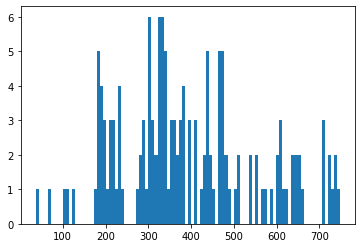

In [239]:
plt.hist(matches_x_y_values_train[:,1], 100)
# matches_x_y_values_query[:,0]

In [260]:
# filtering
filter_array = []
for index in np.arange(len(matches_x_y_values_query)):
    if abs(x_mean_query - matches_x_y_values_query[index, 0]) < x_std_query:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_query = matches_x_y_values_query[filter_array]

filter_array = []
for index in np.arange(len(filtered_matches_x_y_values_query)):
    if abs(y_mean_query - filtered_matches_x_y_values_query[index, 1]) < y_std_query:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_query = filtered_matches_x_y_values_query[filter_array]

filter_array = []
for index in np.arange(len(matches_x_y_values_train)):
    if abs(x_mean_train - matches_x_y_values_train[index, 0]) < x_std_train:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_train = matches_x_y_values_train[filter_array]

filter_array = []
for index in np.arange(len(filtered_matches_x_y_values_train)):
    if abs(y_mean_train - filtered_matches_x_y_values_train[index, 1]) < y_std_train:
        filter_array.append(True)
    else:
        filter_array.append(False)

filtered_matches_x_y_values_train = filtered_matches_x_y_values_train[filter_array]

(array([1., 0., 0., 0., 1., 1., 0., 0., 0., 2., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 3., 0., 1., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 2., 0., 0.,
        2., 2., 3., 0., 1., 2., 1., 0., 0., 1., 0., 1., 2., 0., 2., 0., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([149.35896, 151.55157, 153.74417, 155.93678, 158.1294 , 160.322  ,
        162.5146 , 164.70721, 166.89983, 169.09244, 171.28503, 173.47765,
        175.67026, 177.86285, 180.05547, 182.24808, 184.44069, 186.63329,
        188.8259 , 191.01851, 193.21112, 195.40372, 197.59633, 199.78894,
        201.98155, 204.17415, 206.36676, 208.55937, 210.75197, 212.94458,
        215.13719, 217.3298 , 219.5224 , 221.71501, 223.90762, 226.10023,
        228.29283, 230.48544, 232.67805, 234.87065, 237.06326, 239.25587,
        241.44849, 243.64108, 24

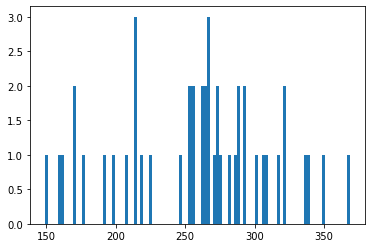

In [266]:
plt.hist(filtered_matches_x_y_values_query[:,0], 100)

In [270]:
matches_x_y_values_train[0] = 

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [267]:
img3 = cv2.drawMatches(img, keypoints_1, img1, keypoints_2, matches, img1, flags=2)

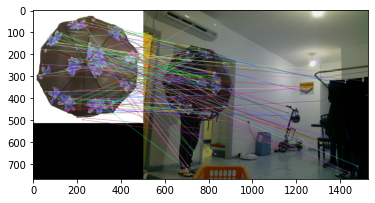

(<matplotlib.image.AxesImage at 0x2cd178f4790>, None)

In [268]:
plt.imshow(img3),plt.show()